## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1          X2        X3         X4           Y
0  95.534922  314.028123  0.175799  10.973464  110.362587
1  12.630513  224.556711  0.378119   7.751623   85.890369
2  77.175284  222.307720  0.334705   7.388797  107.241814
3  58.669290  924.603597  0.165933   3.272114  164.102290
4  31.568484  409.332789  0.957109   7.759433  393.008247


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9511417	total: 58ms	remaining: 58s
1:	learn: 0.9403246	total: 58.4ms	remaining: 29.2s
2:	learn: 0.9279530	total: 58.8ms	remaining: 19.6s
3:	learn: 0.9174371	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9065554	total: 59.9ms	remaining: 11.9s
5:	learn: 0.8961523	total: 60.5ms	remaining: 10s
6:	learn: 0.8841876	total: 61.1ms	remaining: 8.67s
7:	learn: 0.8720158	total: 61.6ms	remaining: 7.64s
8:	learn: 0.8615378	total: 62.1ms	remaining: 6.84s
9:	learn: 0.8491991	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8386175	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8271066	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8162226	total: 63.9ms	remaining: 4.86s
13:	learn: 0.8048393	total: 64.4ms	remaining: 4.53s
14:	learn: 0.7949973	total: 64.8ms	remaining: 4.25s
15:	learn: 0.7853612	total: 65.2ms	remaining: 4.01s
16:	learn: 0.7750748	total: 65.5ms	remaining: 3.79s
17:	learn: 0.7672325	total: 66ms	remaining: 3.6s
18:	learn: 0.7589631	total: 66.4ms	remaining: 3.43s
19

113:	learn: 0.2638861	total: 108ms	remaining: 838ms
114:	learn: 0.2606273	total: 108ms	remaining: 833ms
115:	learn: 0.2585470	total: 109ms	remaining: 829ms
116:	learn: 0.2554080	total: 109ms	remaining: 824ms
117:	learn: 0.2526053	total: 110ms	remaining: 819ms
118:	learn: 0.2505565	total: 110ms	remaining: 814ms
119:	learn: 0.2484639	total: 110ms	remaining: 810ms
120:	learn: 0.2454384	total: 111ms	remaining: 805ms
121:	learn: 0.2434262	total: 111ms	remaining: 800ms
122:	learn: 0.2410326	total: 112ms	remaining: 796ms
123:	learn: 0.2391443	total: 112ms	remaining: 790ms
124:	learn: 0.2374172	total: 112ms	remaining: 786ms
125:	learn: 0.2353520	total: 113ms	remaining: 782ms
126:	learn: 0.2327182	total: 113ms	remaining: 777ms
127:	learn: 0.2302935	total: 113ms	remaining: 772ms
128:	learn: 0.2279153	total: 114ms	remaining: 768ms
129:	learn: 0.2260285	total: 114ms	remaining: 764ms
130:	learn: 0.2241536	total: 115ms	remaining: 760ms
131:	learn: 0.2220551	total: 115ms	remaining: 756ms
132:	learn: 

296:	learn: 0.0608356	total: 186ms	remaining: 440ms
297:	learn: 0.0605107	total: 187ms	remaining: 439ms
298:	learn: 0.0600541	total: 187ms	remaining: 438ms
299:	learn: 0.0596061	total: 187ms	remaining: 437ms
300:	learn: 0.0591678	total: 188ms	remaining: 436ms
301:	learn: 0.0588003	total: 188ms	remaining: 435ms
302:	learn: 0.0584571	total: 189ms	remaining: 434ms
303:	learn: 0.0581762	total: 189ms	remaining: 433ms
304:	learn: 0.0578421	total: 189ms	remaining: 432ms
305:	learn: 0.0575116	total: 190ms	remaining: 431ms
306:	learn: 0.0572462	total: 190ms	remaining: 430ms
307:	learn: 0.0569075	total: 191ms	remaining: 428ms
308:	learn: 0.0566095	total: 191ms	remaining: 427ms
309:	learn: 0.0562773	total: 192ms	remaining: 426ms
310:	learn: 0.0559395	total: 192ms	remaining: 425ms
311:	learn: 0.0556328	total: 192ms	remaining: 424ms
312:	learn: 0.0553439	total: 193ms	remaining: 423ms
313:	learn: 0.0551005	total: 193ms	remaining: 422ms
314:	learn: 0.0547830	total: 194ms	remaining: 421ms
315:	learn: 

545:	learn: 0.0202785	total: 290ms	remaining: 241ms
546:	learn: 0.0201820	total: 291ms	remaining: 241ms
547:	learn: 0.0200743	total: 291ms	remaining: 240ms
548:	learn: 0.0200036	total: 291ms	remaining: 239ms
549:	learn: 0.0199105	total: 292ms	remaining: 239ms
550:	learn: 0.0198471	total: 292ms	remaining: 238ms
551:	learn: 0.0197852	total: 292ms	remaining: 237ms
552:	learn: 0.0196988	total: 293ms	remaining: 237ms
553:	learn: 0.0196142	total: 293ms	remaining: 236ms
554:	learn: 0.0195540	total: 294ms	remaining: 236ms
555:	learn: 0.0194714	total: 294ms	remaining: 235ms
556:	learn: 0.0194126	total: 295ms	remaining: 234ms
557:	learn: 0.0193111	total: 295ms	remaining: 234ms
558:	learn: 0.0192307	total: 295ms	remaining: 233ms
559:	learn: 0.0191735	total: 296ms	remaining: 232ms
560:	learn: 0.0190950	total: 296ms	remaining: 232ms
561:	learn: 0.0190391	total: 297ms	remaining: 231ms
562:	learn: 0.0189625	total: 297ms	remaining: 231ms
563:	learn: 0.0189080	total: 298ms	remaining: 230ms
564:	learn: 

724:	learn: 0.0124355	total: 368ms	remaining: 139ms
725:	learn: 0.0124082	total: 368ms	remaining: 139ms
726:	learn: 0.0123863	total: 369ms	remaining: 138ms
727:	learn: 0.0123469	total: 369ms	remaining: 138ms
728:	learn: 0.0123201	total: 369ms	remaining: 137ms
729:	learn: 0.0122815	total: 370ms	remaining: 137ms
730:	learn: 0.0122412	total: 370ms	remaining: 136ms
731:	learn: 0.0122197	total: 371ms	remaining: 136ms
732:	learn: 0.0121574	total: 371ms	remaining: 135ms
733:	learn: 0.0121178	total: 371ms	remaining: 135ms
734:	learn: 0.0120593	total: 372ms	remaining: 134ms
735:	learn: 0.0120202	total: 372ms	remaining: 134ms
736:	learn: 0.0119629	total: 373ms	remaining: 133ms
737:	learn: 0.0119233	total: 373ms	remaining: 132ms
738:	learn: 0.0118776	total: 373ms	remaining: 132ms
739:	learn: 0.0118393	total: 374ms	remaining: 131ms
740:	learn: 0.0118005	total: 374ms	remaining: 131ms
741:	learn: 0.0117628	total: 375ms	remaining: 130ms
742:	learn: 0.0117299	total: 375ms	remaining: 130ms
743:	learn: 

959:	learn: 0.0064827	total: 471ms	remaining: 19.6ms
960:	learn: 0.0064761	total: 472ms	remaining: 19.2ms
961:	learn: 0.0064572	total: 472ms	remaining: 18.7ms
962:	learn: 0.0064375	total: 473ms	remaining: 18.2ms
963:	learn: 0.0064289	total: 473ms	remaining: 17.7ms
964:	learn: 0.0064095	total: 474ms	remaining: 17.2ms
965:	learn: 0.0064011	total: 474ms	remaining: 16.7ms
966:	learn: 0.0063828	total: 474ms	remaining: 16.2ms
967:	learn: 0.0063679	total: 475ms	remaining: 15.7ms
968:	learn: 0.0063516	total: 475ms	remaining: 15.2ms
969:	learn: 0.0063313	total: 476ms	remaining: 14.7ms
970:	learn: 0.0063169	total: 476ms	remaining: 14.2ms
971:	learn: 0.0062990	total: 477ms	remaining: 13.7ms
972:	learn: 0.0062830	total: 477ms	remaining: 13.2ms
973:	learn: 0.0062688	total: 478ms	remaining: 12.7ms
974:	learn: 0.0062513	total: 478ms	remaining: 12.3ms
975:	learn: 0.0062356	total: 478ms	remaining: 11.8ms
976:	learn: 0.0062217	total: 479ms	remaining: 11.3ms
977:	learn: 0.0062046	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

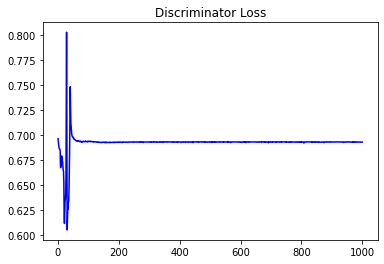

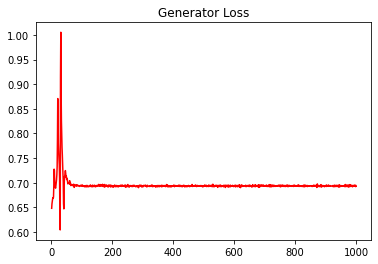

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.04745723062635263


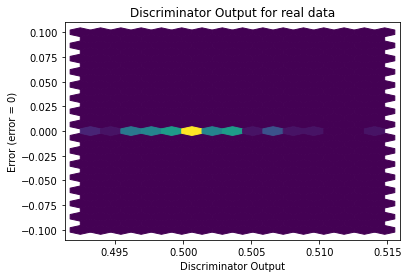

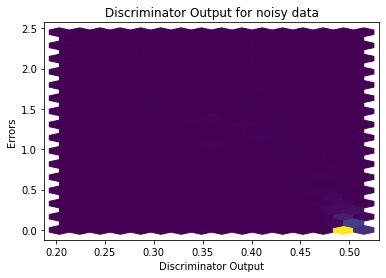

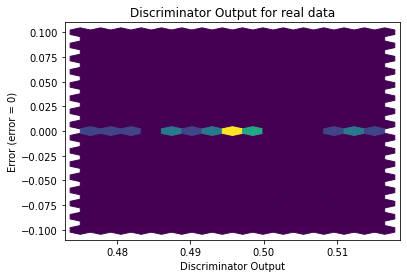

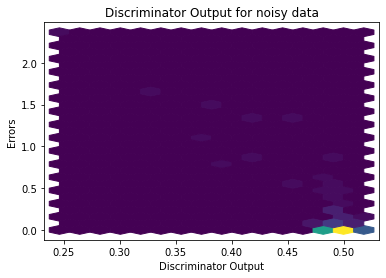

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


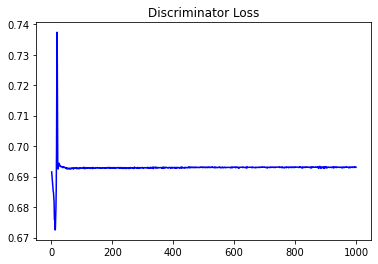

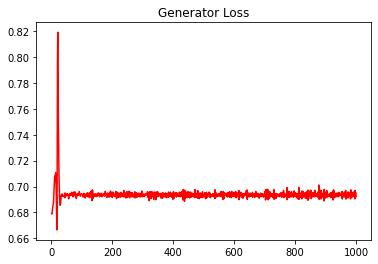

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03779291448481227


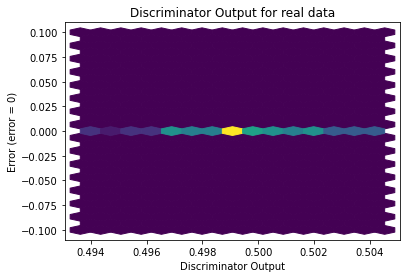

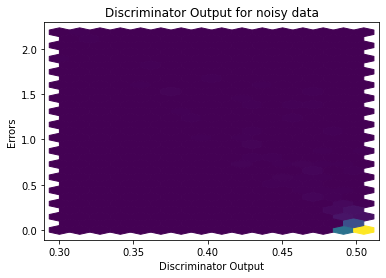

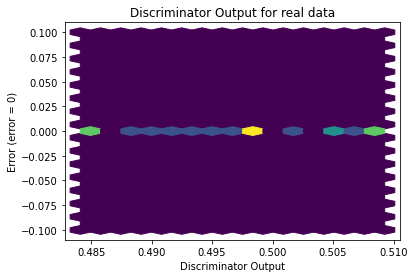

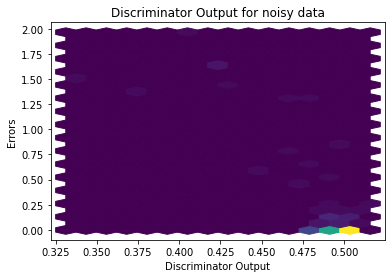

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5819]], requires_grad=True)
